In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

        


Inporting some data..


In [2]:
df = pd.read_csv('../input/montcoalert/911.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


# 1. Top 5 zip codes with the most calls 

In [4]:
df.head()


,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


# 2. Top 5 townships for 911 calls

In [5]:
df['zip'].value_counts().head()

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

In [6]:
df['twp'].value_counts().head()

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

# The most common reason for 911 calls

In [7]:
df['title'].value_counts().head()

Traffic: VEHICLE ACCIDENT -    148372
Traffic: DISABLED VEHICLE -     47909
Fire: FIRE ALARM                38336
EMS: FALL VICTIM                34676
EMS: RESPIRATORY EMERGENCY      34248
Name: title, dtype: int64

# Creating a new column 'reason' with simplyfied titles to every call

In [8]:
# localisation of the oryginal column description 
x = df['title'].iloc[0]

In [9]:
x.split(":")[0]


'EMS'

In [10]:
df['reason'] = df['title'].apply(lambda title: title.split(":")[0])

In [11]:
df['reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
663517    Traffic
663518        EMS
663519        EMS
663520       Fire
663521    Traffic
Name: reason, Length: 663522, dtype: object

In [12]:
df['reason'].value_counts().head()

EMS        332692
Traffic    230208
Fire       100622
Name: reason, dtype: int64

# Countplot of 911 calls by 'reason'

<AxesSubplot:xlabel='reason', ylabel='count'>

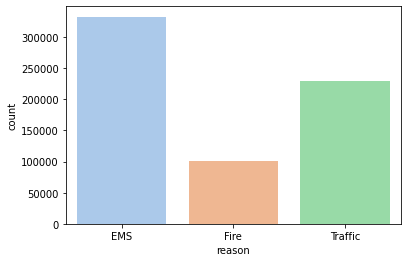

In [13]:
sns.countplot(x='reason', data=df, palette='pastel')

# Creating new columns from 'timeStamp'
# 'hour'
# 'month' 
# 'day_of_week'

In [14]:
df['timeStamp'].iloc[0]

'2015-12-10 17:10:52'

In [15]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])


In [16]:
df['hour'] = df['timeStamp'].apply(lambda time: time.hour)

In [17]:
df['month'] = df['timeStamp'].apply(lambda time: time.month)

In [18]:
df['day_of_week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

# Creating new column 'date' from 'timeStamp'

In [19]:
t = df['timeStamp']


In [20]:
df['date'] = df['timeStamp'].apply(lambda t: t.date())

In [21]:
df['date'].head()

0    2015-12-10
1    2015-12-10
2    2015-12-10
3    2015-12-10
4    2015-12-10
Name: date, dtype: object

# Mapping 'day_of_week' with actual names of days, using map()

In [22]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [23]:
df['day_of_week'] = df['day_of_week'].map(dmap)

In [24]:
df['day_of_week'].head()

0    Thu
1    Thu
2    Thu
3    Thu
4    Thu
Name: day_of_week, dtype: object

# Countplot of 'day_of_week', 'month' with the 'reason' column

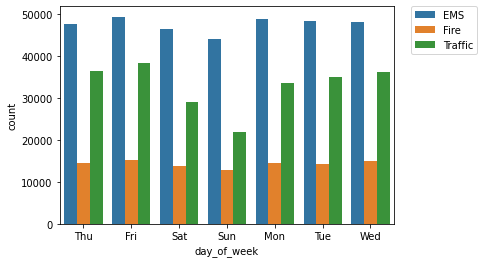

In [25]:
sns.countplot(x='day_of_week', data=df, hue='reason')

# moving legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

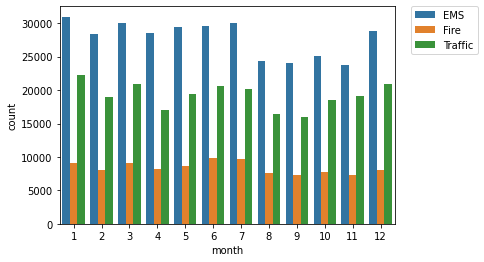

In [26]:
sns.countplot(x='month', data=df, hue='reason')

# moving legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Plot of all 911 calls groupby 'date', count() aghregated

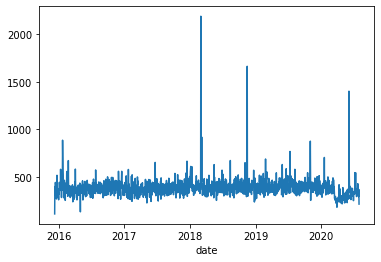

In [27]:
df.groupby('date').count()['lat'].plot()
plt.rcParams["figure.figsize"] = (15,15)

# The number of most calls a day

In [28]:
max_call = df.groupby('date')['lat'].count().max()
max_call

2187

Text(0.5, 1.0, 'Traffic')

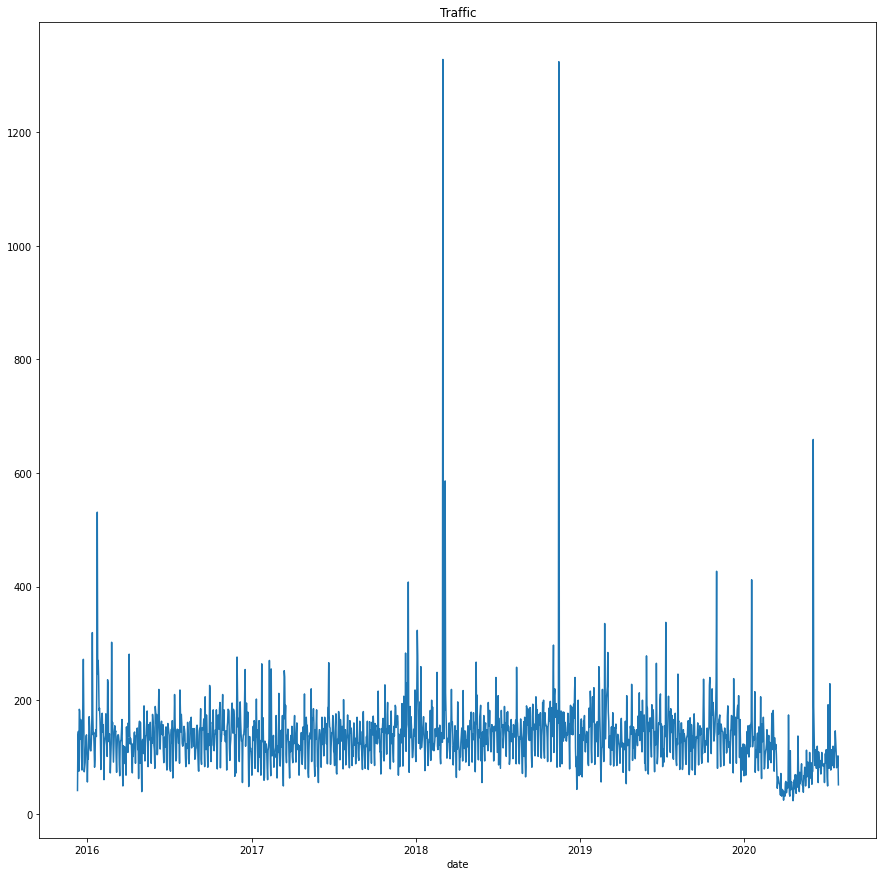

In [29]:
df[df['reason']=='Traffic'].groupby('date').count()['lat'].plot()
plt.rcParams["figure.figsize"] = (15,15)
plt.title('Traffic')

Text(0.5, 1.0, 'Fire')

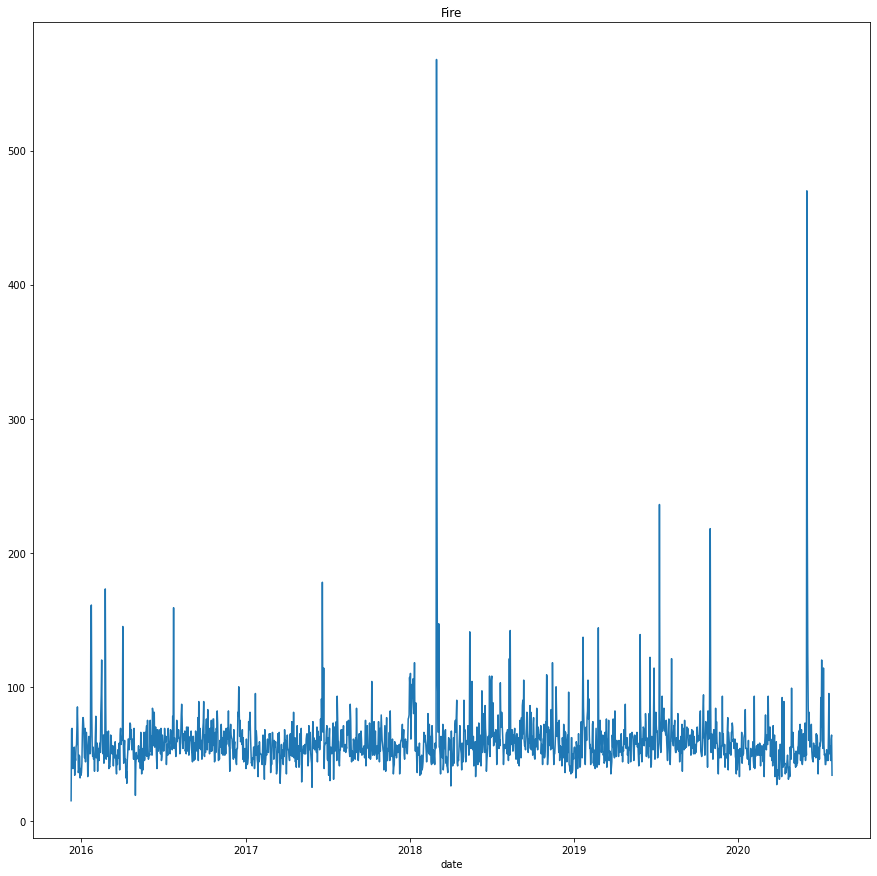

In [30]:
df[df['reason']=='Fire'].groupby('date').count()['lat'].plot()
plt.rcParams["figure.figsize"] = (15,15)
plt.title('Fire')

Text(0.5, 1.0, 'EMS')

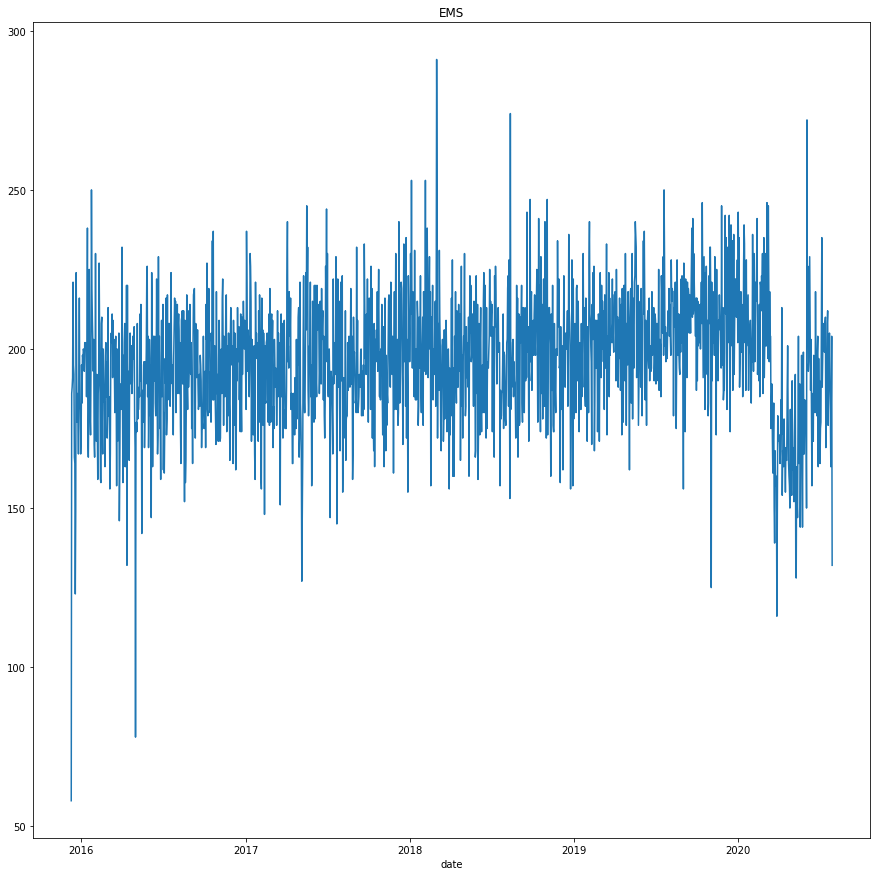

In [31]:
df[df['reason']=='EMS'].groupby('date').count()['lat'].plot()
plt.rcParams["figure.figsize"] = (15,15)
plt.title('EMS')

# Creatin ***heat map*** with unstack() method. Day of the week/ Hour

In [32]:
df.groupby(by=['day_of_week', 'hour']).count()['reason']

day_of_week  hour
Fri          0       1983
             1       1635
             2       1449
             3       1296
             4       1339
                     ... 
Wed          19      4686
             20      4116
             21      3537
             22      2826
             23      2207
Name: reason, Length: 168, dtype: int64

In [33]:
day_hour = df.groupby(by=['day_of_week', 'hour']).count()['reason'].unstack()
day_hour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354
Tue,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,...,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
Wed,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,...,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207


<AxesSubplot:xlabel='hour', ylabel='day_of_week'>

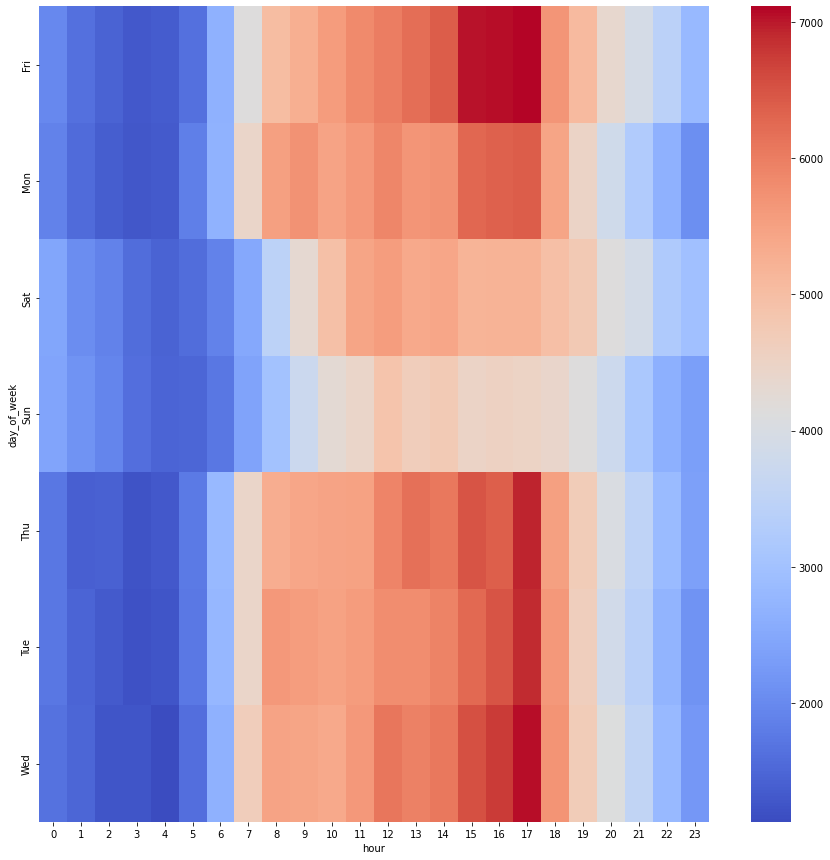

In [34]:
sns.heatmap(day_hour, cmap='coolwarm')

# Heatmap of the Month / Hour

<AxesSubplot:xlabel='month', ylabel='day_of_week'>

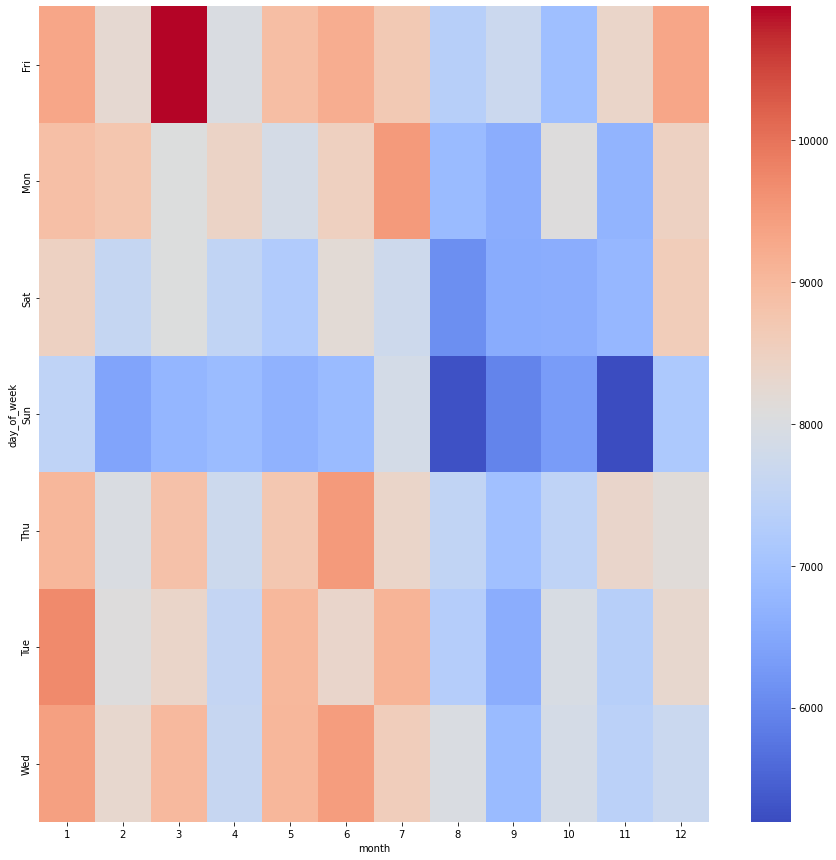

In [35]:
day_month = df.groupby(by=['day_of_week', 'month']).count()['reason'].unstack()
sns.heatmap(day_month, cmap='coolwarm')